In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(os.getcwd())

/Users/lijialin/Desktop/Research/proj-two-stage-task/Tree2


### Task distribution

In [3]:
with open("data/Tree2_v3.json", "r") as f_real:
    real_data = [json.loads(line) for line in f_real]
for entry in real_data:
    entry["source"] = "Human"
    entry["path"] = entry["rewards"]

# # Step 2: Load simulated data
with open("data/pda/model1_pda.json", "r") as f_sim:
    model1_pda_data = [json.loads(line) for line in f_sim]
for entry in model1_pda_data:
    entry["source"] = "model1_pda"

with open("data/pda/model2_pda.json", "r") as f_sim:
    model2_pda_data = [json.loads(line) for line in f_sim]
for entry in model2_pda_data:
    entry["source"] = "model2_pda"

with open("data/pda/model6_pda.json", "r") as f_sim:
    model6_pda_data = [json.loads(line) for line in f_sim]
for entry in model6_pda_data:
    entry["source"] = "model6_pda"

# with open("data/rss/model1_RSS.json", "r") as f_sim:
#     model1_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model1_RSS_data:
#     entry["source"] = "model1_RSS"

# with open("Tree2/data/model1.json", "r") as f_sim:
#     model1_data = [json.loads(line) for line in f_sim]
# for entry in model1_data:
#     entry["source"] = "model1"

# with open("data/Tree2_sim/simulate_model6.json", "r") as f_sim:
#     model6_data = [json.loads(line) for line in f_sim]
# for entry in model6_data:
#     entry["source"] = "model6"

# with open("Tree2/data/rss/model2_RSS.json", "r") as f_sim:
#     model2_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model2_RSS_data:
#     entry["source"] = "model2_RSS"

# with open("Tree2/data/rss/model3_RSS.json", "r") as f_sim:
#     model3_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model3_RSS_data:
#     entry["source"] = "model3_RSS"

# with open("Tree2/data/rss/model4_RSS.json", "r") as f_sim:
#     model4_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model4_RSS_data:
#     entry["source"] = "model4_RSS"

# with open("Tree2/data/rss/model5_RSS.json", "r") as f_sim:
#     model5_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model5_RSS_data:
#     entry["source"] = "model5_RSS"

# with open("Tree2/data/rss/model6_RSS.json", "r") as f_sim:
#     model6_RSS_data = [json.loads(line) for line in f_sim]
# for entry in model6_RSS_data:
#     entry["source"] = "model6_RSS"





# Step 3: Combine and save
# df = real_data + model1_data + model2_data + model3_data + model4_data + \
#     model5_data + model6_data + model7_data + model8_data + model9_data + model10_data + model14_data

# df = real_data + model6_pda_data + model6_ibs_data + model6_analytic_data + model6_analytic_de_data + model6_de_data + model6_RSS_data
df = real_data + model1_pda_data + model6_pda_data + model2_pda_data

df = pd.DataFrame(df)
df

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,path,model,simulation_id,timeout
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6.0,3.0,Human,"[-4, -5, 0, 3]",NaN,NaN,NaN
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3.0,1.0,Human,"[1, -1, -3, -2]",NaN,NaN,NaN
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10.0,5.0,Human,"[3, 8, -5, -4]",NaN,NaN,NaN
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6.0,6.0,Human,"[0, 2, 7, 1]",NaN,NaN,NaN
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11.0,4.0,Human,"[4, 8, -7, -6]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18351,w2424d8d,"[-1.0, 6.0, -3.0, -8.0]","[3.0, -4.0]","[-4.0, 3.0, 1.0, -4.0]",1,2,2470,852,3322,10.0,10.0,7.0,model2_pda,"[-1.0, 6.0, -3.0, -8.0]",model2,1.0,False
18352,w2424d8d,"[-3.0, -4.0, -2.0, -5.0]","[-3.0, -3.0]","[0.0, -1.0, 1.0, -2.0]",2,3,1951,1176,3127,2.0,2.0,3.0,model2_pda,"[-3.0, -4.0, -2.0, -5.0]",model2,1.0,False
18353,w2424d8d,"[7.0, 4.0, -7.0, -6.0]","[3.0, -3.0]","[4.0, 1.0, -4.0, -3.0]",1,1,3747,3396,7143,10.0,10.0,3.0,model2_pda,"[7.0, 4.0, -7.0, -6.0]",model2,1.0,False
18354,w2424d8d,"[1.0, 2.0, 0.0, 3.0]","[3.0, -1.0]","[-2.0, -1.0, 1.0, 4.0]",1,1,1848,2587,4435,2.0,2.0,1.0,model2_pda,"[1.0, 2.0, 0.0, 3.0]",model2,1.0,False


In [4]:
def subtree_vals(path_value, choice1):

    if choice1 == 1:
        return path_value[0:2]
    else:
        return path_value[2:4]

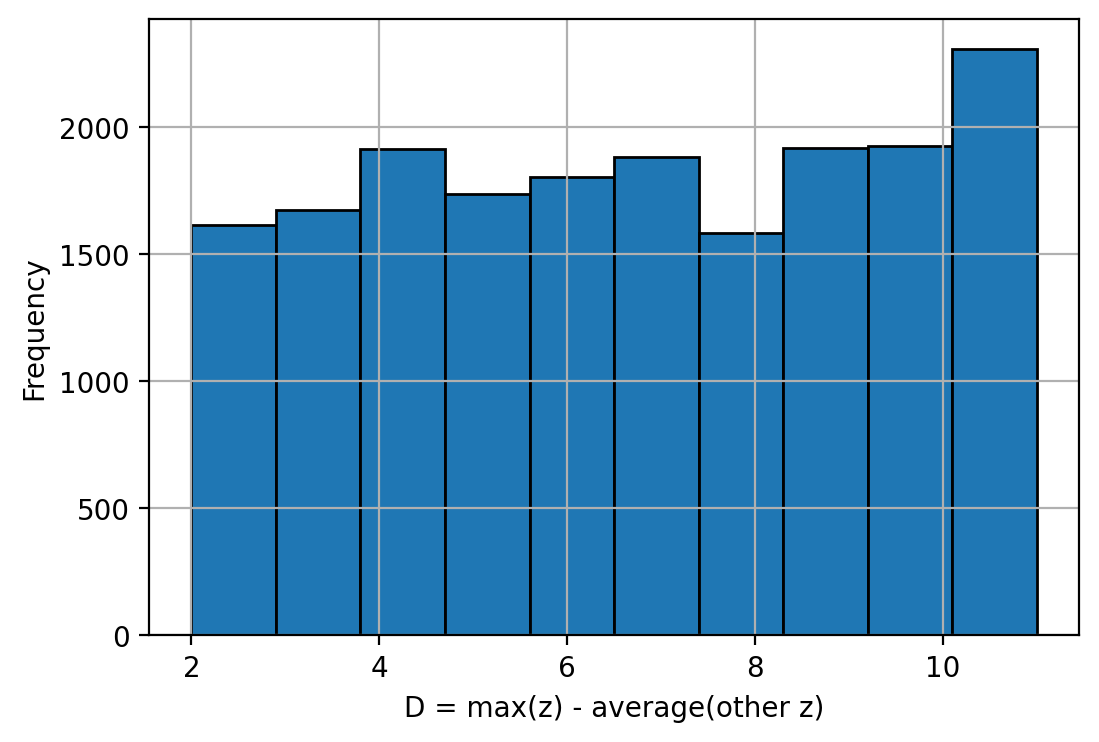

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("D = max(z) - average(other z)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [6]:
# first stage accuracy

df['best_path_idx'] = df['path'].apply(lambda v: int(np.argmax(v)))
df['correct1'] = df.apply(
    lambda r: (r['best_path_idx'] < 2 and r['choice1'] == 1)
              or (r['best_path_idx'] >= 2 and r['choice1'] == 2),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,path,model,simulation_id,timeout,best_path_idx,correct1
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6.0,3.0,Human,"[-4, -5, 0, 3]",NaN,NaN,NaN,3,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3.0,1.0,Human,"[1, -1, -3, -2]",NaN,NaN,NaN,0,False
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10.0,5.0,Human,"[3, 8, -5, -4]",NaN,NaN,NaN,1,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6.0,6.0,Human,"[0, 2, 7, 1]",NaN,NaN,NaN,2,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11.0,4.0,Human,"[4, 8, -7, -6]",NaN,NaN,NaN,1,True


In [7]:
# 5. Second‐stage correctness:
#    “Selected the higher‐rated item in that subtree”
df['correct2'] = df.apply(
    lambda r: (
        r['value2'][r['choice2'] - 1]
        == max(subtree_vals(r['value2'], r['choice1']))
    ),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,path,model,simulation_id,timeout,best_path_idx,correct1,correct2
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6.0,3.0,Human,"[-4, -5, 0, 3]",NaN,NaN,NaN,3,True,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3.0,1.0,Human,"[1, -1, -3, -2]",NaN,NaN,NaN,0,False,True
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10.0,5.0,Human,"[3, 8, -5, -4]",NaN,NaN,NaN,1,True,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6.0,6.0,Human,"[0, 2, 7, 1]",NaN,NaN,NaN,2,True,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11.0,4.0,Human,"[4, 8, -7, -6]",NaN,NaN,NaN,1,True,True


In [8]:
# 6. Overall correctness
df['correct_all'] = df['correct1'] & df['correct2']
df.tail()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,...,diff2,source,path,model,simulation_id,timeout,best_path_idx,correct1,correct2,correct_all
18351,w2424d8d,"[-1.0, 6.0, -3.0, -8.0]","[3.0, -4.0]","[-4.0, 3.0, 1.0, -4.0]",1,2,2470,852,3322,10.0,...,7.0,model2_pda,"[-1.0, 6.0, -3.0, -8.0]",model2,1.0,False,1,True,True,True
18352,w2424d8d,"[-3.0, -4.0, -2.0, -5.0]","[-3.0, -3.0]","[0.0, -1.0, 1.0, -2.0]",2,3,1951,1176,3127,2.0,...,3.0,model2_pda,"[-3.0, -4.0, -2.0, -5.0]",model2,1.0,False,2,True,True,True
18353,w2424d8d,"[7.0, 4.0, -7.0, -6.0]","[3.0, -3.0]","[4.0, 1.0, -4.0, -3.0]",1,1,3747,3396,7143,10.0,...,3.0,model2_pda,"[7.0, 4.0, -7.0, -6.0]",model2,1.0,False,0,True,True,True
18354,w2424d8d,"[1.0, 2.0, 0.0, 3.0]","[3.0, -1.0]","[-2.0, -1.0, 1.0, 4.0]",1,1,1848,2587,4435,2.0,...,1.0,model2_pda,"[1.0, 2.0, 0.0, 3.0]",model2,1.0,False,3,False,False,False
18355,w2424d8d,"[5.0, -1.0, -5.0, 0.0]","[1.0, -3.0]","[4.0, -2.0, -2.0, 3.0]",1,1,2327,840,3167,7.0,...,6.0,model2_pda,"[5.0, -1.0, -5.0, 0.0]",model2,1.0,False,0,True,True,True


### Fig. A

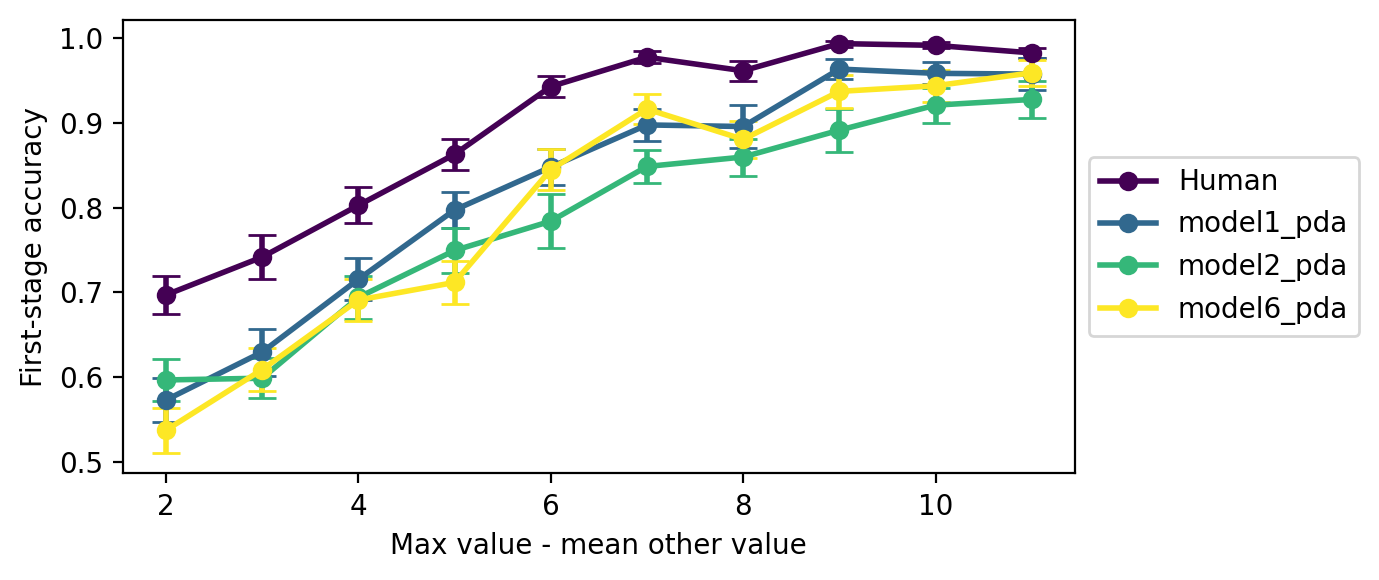

In [9]:
per1 = (
    df.groupby(['source','wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. 创建 colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. 画图
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Fig. B

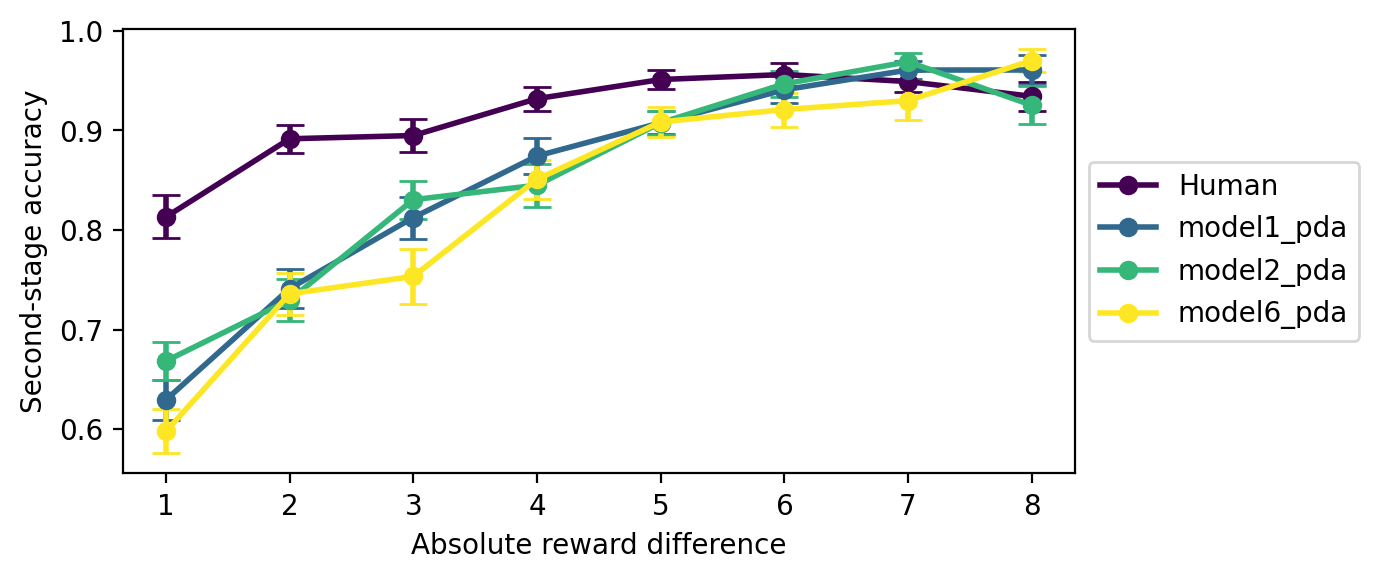

In [10]:
# 1. 每个被试的 second-stage accuracy
per2 = (
    df.groupby(['source', 'wid', 'diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. group-level mean, std, sem
stats = (
    per2.groupby(['source', 'diff2'])['accuracy2']
         .agg(['mean', 'std', 'count'])
         .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')

# 5. custom legend with color proxy
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

### Fig. D

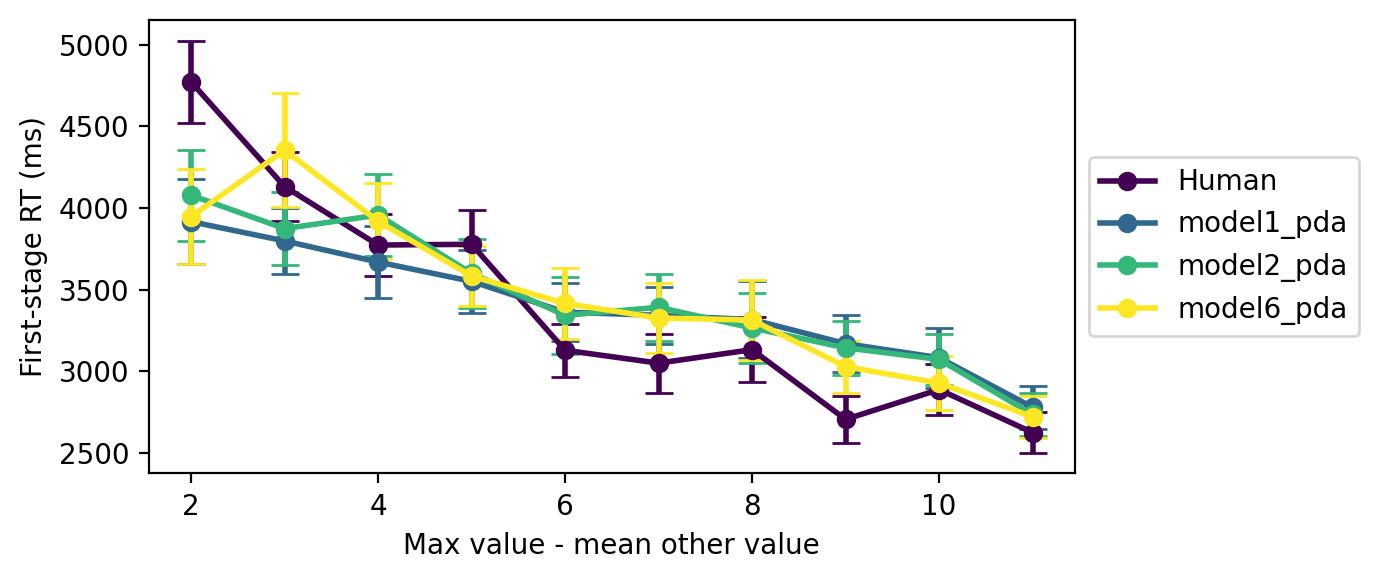

In [11]:
# 1. Compute mean RT per subject per diff1 (correct trials only)
rt1 = (
    df[df['correct1']]
      .groupby(['source', 'wid', 'diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Group-level stats
stats = (
    rt1.groupby(['source', 'diff1'])['mean_rt1']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Setup colormap (modern API, no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

### Fig. E

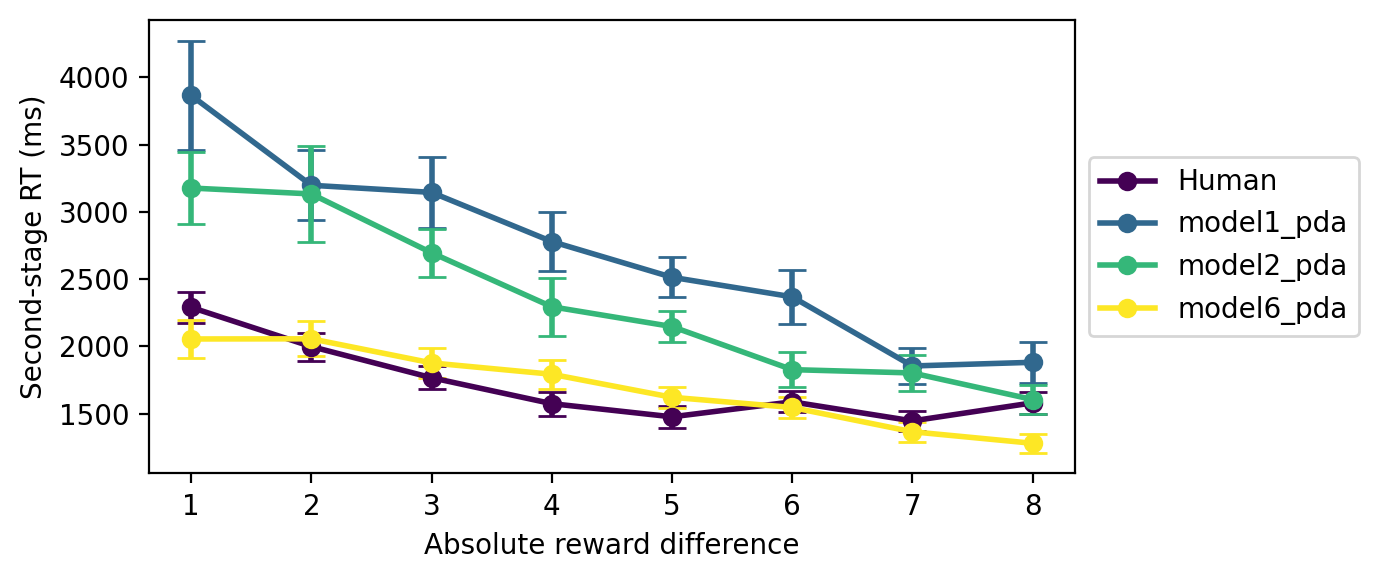

In [12]:
# 1. Mean RT for correct second-stage responses by subject × diff2
rt2 = (
    df[df['correct2']]
      .groupby(['source', 'wid', 'diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Group-level mean, std, count
stats = (
    rt2.groupby(['source', 'diff2'])['mean_rt2']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

### Fig. F

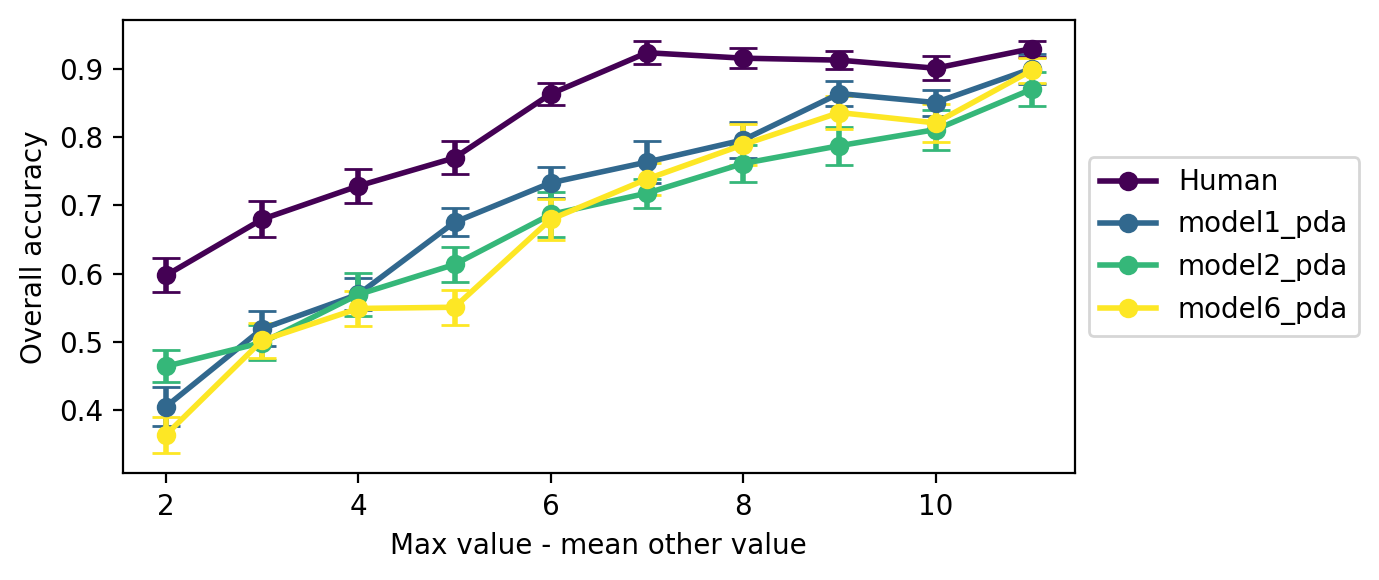

In [13]:
# 1. Compute mean accuracy per subject × diff1
per1 = (
    df.groupby(['source', 'wid', 'diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Group-level mean, std, sem
stats = (
    per1.groupby(['source', 'diff1'])['accuracy']
         .agg(['mean', 'std', 'count'])
         .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap (modern API, gradient coloring)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')

# Optional: ax.set_ylim(0, 1)

# 5. Color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

### Fig. C

In [14]:
def subtree_relation_code(rewards):
    # get indices of rewards sorted descending: [best, 2nd, 3rd, worst]
    idx_desc = np.argsort(rewards)[::-1]
    best, second, third, worst = idx_desc
    # define which subtree each index lives in (0 = left [0,1], 1 = right [2,3])
    subtree = lambda i: 0 if i < 2 else 1

    if subtree(best) == subtree(second):
        return 1
    elif subtree(best) == subtree(third):
        return 2
    elif subtree(best) == subtree(worst):
        return 3
    else:
        return np.nan

# Add the new column to your DataFrame
df['subtree_relation'] = df['path'].apply(subtree_relation_code)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,...,source,path,model,simulation_id,timeout,best_path_idx,correct1,correct2,correct_all,subtree_relation
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,...,Human,"[-4, -5, 0, 3]",NaN,NaN,NaN,3,True,True,True,1
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,...,Human,"[1, -1, -3, -2]",NaN,NaN,NaN,0,False,True,False,1
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,...,Human,"[3, 8, -5, -4]",NaN,NaN,NaN,1,True,True,True,1
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,...,Human,"[0, 2, 7, 1]",NaN,NaN,NaN,2,True,True,True,2
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,...,Human,"[4, 8, -7, -6]",NaN,NaN,NaN,1,True,True,True,1


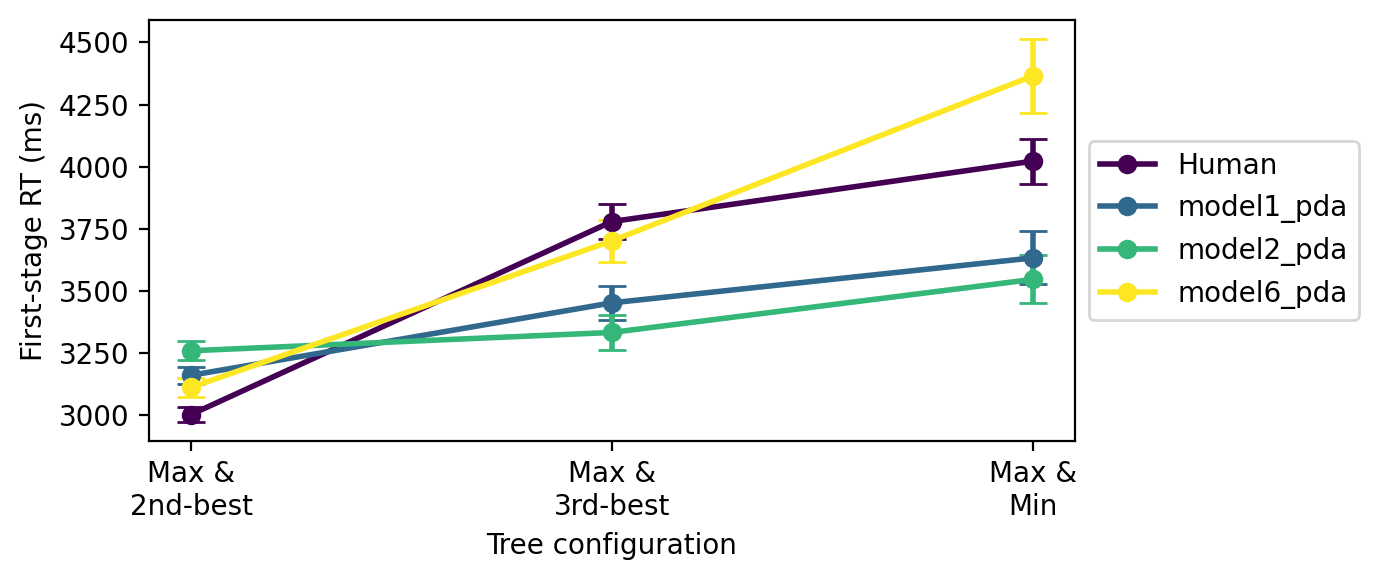

In [15]:
# 1. Compute mean and SEM of RT1 per source × subtree_relation
stats = df.groupby(['source', 'subtree_relation'])['rt1'].agg(['mean', 'sem']).reset_index()

# 2. Setup colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['subtree_relation'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

# 4. Label formatting
ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Max &\n2nd-best', 'Max &\n3rd-best', 'Max &\nMin'])
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom color-coded legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()


### RSS

In [16]:
# ==== RSS for Solway & Botvinick-style five curves (A–E) ====
# Conventions (matching your notebook):
#  A: First-stage accuracy vs diff1
#  B: Second-stage accuracy vs diff2
#  C: First-stage RT (correct only) vs diff1   [scale ÷ 10,000]
#  D: Second-stage RT (correct only) vs diff2  [scale ÷ 1,000]
#  E: First-stage RT (correct only) vs subtree_relation∈{1,2,3}  [scale ÷ 10,000]

def _per_subject_then_group_mean(df, by_cols, y_col):
    """
    Your plotting pipeline averages per subject first, then takes group means.
    We replicate that exactly here.
    Returns a dataframe with columns: by_cols + ['group_mean']
    """
    # per-subject means
    per_subj = (
        df.groupby(['source', 'wid'] + by_cols, observed=True)[y_col]
          .mean()
          .reset_index()
          .rename(columns={y_col: 'per_subject_mean'})
    )
    # group (across subjects) mean
    grp = (
        per_subj.groupby(['source'] + by_cols, observed=True)['per_subject_mean']
                .mean()
                .reset_index()
                .rename(columns={'per_subject_mean': 'group_mean'})
    )
    return grp

def _curve_as_dict(grp_df, source, x_col):
    """Map x -> group_mean for a given source."""
    sub = grp_df[grp_df['source'] == source]
    return dict(zip(sub[x_col], sub['group_mean']))

def _rss_on_intersection(real_map, model_map):
    """Sum (model-real)^2 over keys present in BOTH maps (no penalty for missing bins)."""
    keys = set(real_map.keys()) & set(model_map.keys())
    return float(sum((model_map[k] - real_map[k])**2 for k in keys)), sorted(keys)

def compute_rss_bundle(df):
    # ----- A: S1 accuracy vs diff1 -----
    A_df = _per_subject_then_group_mean(
        df=df,
        by_cols=['diff1'],
        y_col='correct1'
    )

    # ----- B: S2 accuracy vs diff2 -----
    B_df = _per_subject_then_group_mean(
        df=df,
        by_cols=['diff2'],
        y_col='correct2'
    )

    # ----- C: S1 RT (correct only) vs diff1; scale ÷ 10,000 -----
    C_df = _per_subject_then_group_mean(
        df=df[df['correct1']],
        by_cols=['diff1'],
        y_col='rt1'
    ).assign(group_mean=lambda d: d['group_mean'] / 10_000.0)

    # ----- D: S2 RT (correct only) vs diff2; scale ÷ 1,000 -----
    D_df = _per_subject_then_group_mean(
        df=df[df['correct2']],
        by_cols=['diff2'],
        y_col='rt2'
    ).assign(group_mean=lambda d: d['group_mean'] / 1_000.0)

    # ----- E: S1 RT (correct only) vs subtree_relation∈{1,2,3}; scale ÷ 10,000 -----
    # (Paper uses first-stage RT grouped by whether max pairs with 2nd-best / 3rd-best / min;
    #  we mirror your `subtree_relation` codes 1,2,3 and filter to correct1.)
    E_df = _per_subject_then_group_mean(
        df=df[df['correct1'] & df['subtree_relation'].isin([1,2,3])],
        by_cols=['subtree_relation'],
        y_col='rt1'
    ).assign(group_mean=lambda d: d['group_mean'] / 10_000.0)

    # Build dicts (x -> mean) for each source
    sources = sorted(df['source'].unique())
    curves = {
        'A': ('diff1', A_df),
        'B': ('diff2', B_df),
        'C': ('diff1', C_df),
        'D': ('diff2', D_df),
        'E': ('subtree_relation', E_df),
    }

    # Compare each model against 'real'
    results = {}
    for model in [s for s in sources if s != 'Human']:
        pieces = {}
        total = 0.0
        for label, (xcol, gdf) in curves.items():
            real_map  = _curve_as_dict(gdf, 'Human',  xcol)
            model_map = _curve_as_dict(gdf, model, xcol)
            rss, used_bins = _rss_on_intersection(real_map, model_map)
            pieces[label] = {
                'rss': rss,
                'bins_used': used_bins,
                'n_bins': len(used_bins),
            }
            total += rss
        results[model] = {'per_curve': pieces, 'total_rss': total}
    return results, curves

# --- Run RSS computation ---
rss_results, curve_tables = compute_rss_bundle(df)

# --- Print per-curve RSS and totals ---
def _fmt_curve(curve_key, piece):
    bins_str = ', '.join(map(str, piece['bins_used'])) if piece['bins_used'] else '—'
    return f"{curve_key}: RSS={piece['rss']:.6g} (bins={piece['n_bins']}; {bins_str})"

for model, info in rss_results.items():
    print(f"\n=== RSS vs REAL for {model} ===")
    for k in ['A','B','C','D','E']:
        print(_fmt_curve(k, info['per_curve'][k]))
    print(f"TOTAL RSS: {info['total_rss']:.6g}")

# --- BIC computation ---
# n = number of participants (unique wid in REAL) unless you override
EXP_N = None  # e.g., set to 29 or 45 to force experiment-specific n
n_participants = (df[df['source'] == 'Human']['wid'].nunique()
                  if EXP_N is None else int(EXP_N))

# parameter counts per model (edit if needed)
param_counts = {
    'model1': 6,   # d1,d2,θ1,θ2,T1,T2
    'model6_pda': 6,   # adjust if different
    'model6_ibs': 6,   # adjust if different
    'model6_analytic': 6,   # adjust if different
    'model6_RSS': 6,   # adjust if different
    'model1_RSS': 6,   # adjust if different
    'model2_RSS': 6,   # adjust if different
    'model3_RSS': 7,   # adjust if different
    'model4_RSS': 7,   # adjust if different
    'model7_RSS': 8,   # adjust if different
    'model5_RSS': 5,   # adjust if different
}

_EPS = 1e-12
bic_rows = []
print(f"\nBIC with n = {n_participants} (unique REAL participants)\n")
for model, info in rss_results.items():
    k = param_counts.get(model, np.nan)
    rss = float(info['total_rss'])
    if np.isnan(k):
        print(f"[WARN] Unknown parameter count for {model}; set it in param_counts.")
        continue
    bic = k * np.log(n_participants) + n_participants * np.log(max(rss, _EPS) / n_participants)
    print(f"{model:>10s}  |  RSS = {rss:.6g}  |  k = {k:2d}  |  BIC = {bic:.6g}")
    bic_rows.append({'model': model, 'RSS': rss, 'k': k, 'n': n_participants, 'BIC': bic})


=== RSS vs REAL for model1_pda ===
A: RSS=0.0623916 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0)
B: RSS=0.0694792 (bins=8; 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
C: RSS=0.0135631 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0)
D: RSS=9.21412 (bins=8; 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
E: RSS=0.00242491 (bins=3; 1, 2, 3)
TOTAL RSS: 9.36198

=== RSS vs REAL for model2_pda ===
A: RSS=0.12613 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0)
B: RSS=0.0613202 (bins=8; 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
C: RSS=0.0103155 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0)
D: RSS=4.09222 (bins=8; 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
E: RSS=0.00451282 (bins=3; 1, 2, 3)
TOTAL RSS: 4.29449

=== RSS vs REAL for model6_pda ===
A: RSS=0.104559 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0)
B: RSS=0.101962 (bins=8; 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
C: RSS=0.0109564 (bins=10; 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0

In [17]:
bic_table = pd.DataFrame(bic_rows).sort_values('BIC').reset_index(drop=True)
bic_table

,model,RSS,k,n,BIC
0,model6_pda,0.457651,6,45,-183.63401
